# I. A simple linear classifier with python

Mục đích của ví dụ này không phải để chứng minh cách chúng ta train một mô hình từ đầu đến cuối, mà đơn giản là để thể hiện cách làm sao chúng ta khởi tạo một ma trận trọng số **W** và bias vector **b**, sau đó sử dụng những thông số này để phân loại một hình dựa trên một phép tích vô hướng đơn giản (dot product)

In [1]:
# import the necessary packages
import numpy as np
import cv2

# initialize the class labels and set the seed of the pseudorandom
# number generator so we can reproduce our results
labels = ["dog", "cat", "panda"] # khởi tạo danh sách các nhãn đầu ra
np.random.seed(1)

In [2]:
# randomly initialize our weight matrix and bias vector -- in a
# *real* training and classification task, these parameters would
# be *learned* by our model, but for the sake of this example,
# let’s use random values
W = np.random.randn(3, 3072)
b = np.random.randn(3)

- Khởi tạo ma trận trọng số **W** với giá trị ngẫu nhiên thuộc phân phối đều, mẫu nằm trong khoảng [0,1]. Ma trận trọng số này có 3 hàng (mỗi hàng cho một nhãn) và 3072 cột (mỗi cột cho mỗi pixel 32x32x3)
- Chúng ta sau đó khởi tạo bias vector **b**, vector này cũng được ngẫu nhiên điền giá trị trong mẫu phân phối trong range [0,1]. Bias vector này có 3 hàng (mỗi hàng tương ứng 1 nhãn) đi theo cùng là 1 cột

In [3]:
W

array([[ 1.62434536, -0.61175641, -0.52817175, ...,  1.20731703,
         1.37766662,  0.63628393],
       [ 0.05529735,  0.40581712,  1.24845728, ..., -1.95176055,
         0.21272915,  0.10822446],
       [ 0.13130697, -1.36381382,  0.23921477, ..., -0.67836182,
        -1.13521117,  0.05031758]])

In [4]:
b

array([-0.72996827, -0.37260481,  0.9461125 ])

In [5]:
W.shape

(3, 3072)

In [10]:
# load our example image, resize it, and then flatten it into our
# "feature vector" representation
path = "D:\\CBD robotics course\\data\\animal-image-datasetdog-cat-and-panda\\images\\dog.jpg"
orig = cv2.imread(path)
image = cv2.resize(orig, (32,32)).flatten()

Load hình qua `cv2.imread` sau đó resize kích cỡ hình về còn 32x32 pixels. Giờ hình này sẽ được đại diện là một mảng numpy (32, 32, 3) , khi flatten trải ra thì được vector 3072 chiều

In [11]:
# compute the output scores by taking the dot product between the
# weight matrix and image pixels, followed by adding in the bias
scores = W.dot(image) + b

Bước tiếp theo là tính toán điểm số output cho nhãn.
Score này đơn giản là tích vô hướng (dot product) giữa ma trận trọng số **W** với input là độ lớn pixel hình, theo sau là cộng với bias **b**

[INFO] dog: 13322.29
[INFO] cat: -3184.82
[INFO] panda: 3775.88


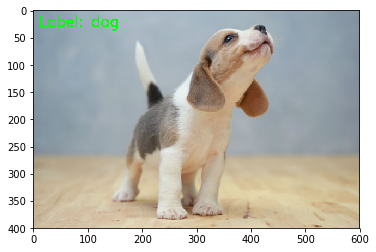

In [14]:
# loop over the scores + labels and display them
for (label, score) in zip(labels, scores):
    print("[INFO] {}: {:.2f}".format(label, score))
    
# draw the label with the highest score on the image as our
# prediction
import matplotlib.pyplot as plt
cv2.putText(orig, "Label: {}".format(labels[np.argmax(scores)]), (10,30), cv2.FONT_HERSHEY_SIMPLEX,
            0.9, (0,255,0), 2)
# display our input image
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()

Ta thấy nhãn dog có điểm số cao nhất. Và đã dự đoán đúng.<br>
**Chú ý**: đây là bài giả định nên nên việc để cho numpy random seed =1 là **_có chủ đích_** để có thể dự đoán đúng. Cho đến lúc này ma trận trọng số **W** và bias vector **b** như dạng một "hộp đen" tức là việc tìm và học được 2 thông số này vẫn chưa được nhắc đến.<br>
Trong thực tiễn chúng ta sẽ không bao giờ khởi tạo được **W** và **b** và giả định là chúng sẽ phân loại đúng mà không thông qua quá trình học. Thay vào đó khi train mô hình từ ban đầu, chúng ta sẽ cần phải tối ưu hóa và học **W** và **b** thông qua thuật toán tối ưu hóa như gradient descent chẳng hạn.

# II. The Role of Loss Function

ở phần đầu đã thảo luận về parameterized learning. Loại học này cho phép chúng ta lấy bộ input và class label, sau đó thông qua một hàm để chuyển input thành output bằng việc định ra bộ tham số và tối ưu hóa chúng.<br>
Nhưng thực sự để "học" và chuyển từ dữ liệu đầu vào thành đầu ra thông qua hàm "scores" này, chúng ta cần thảo luận 02 nội dung quan trọng:
- Loss function (hàm mất mát)
- Optimaztion methods (các phương thức tối ưu - liên quan đến thuật toán)

## 2.1 What Are Loss Functions?

<img src="https://i.imgur.com/cZQX9U6.png" />

Ở mức độ cơ bản nhất, thì loss function là hàm để đánh giá độ tốt- xấu của mô hình. Ở hình trên thì mô hình 1 có kết quả tốt hơn mô hình 2<br>
Hình minh họa loss function được vẽ xuyên suốt 2 mô hình riêng biệt được train. Cái nào nhỏ hơn ra dấu cho mô hình đó có kết quả tốt hơn. Ngược lại loss càng lớn thì càng cần phải cải thiện để tăng độ chính xác.<br>
Mà để cải thiện độ chính xác, ta cần phải tune (điều chỉnh) các tham số của ma trận trọng số **W** hay bias vector **b**. Chính xác là tìm cách cập nhật các thông số này, hay nói cách khác là đi làm bài toán tối ưu hóa.<br>
Đơn giản, cho đến giờ thì có thể hiểu là loss function là một cách để đánh giá hàm chấm điểm (scoring function) đang hoạt động tốt cỡ nào.<br>
Lý tưởng là với các thông số ta đang điều chỉnh thì loss phải giảm dần theo thời gian.<br>
Nhận xét hình trên:
- Ban đầu mô hình 1 thì loss vẫn còn cao so với mô hình 2, nhưng giảm rất nhanh và tiếp tục giảm khi ta train. Ngược lại thì với mô hình 2, khởi đầu thì tốt nhưng về sau thì càng trì trệ.
- Ở ví dụ cụ thể này. Mô hình 1 về tổng thể thì loss giảm và có vẻ là một mô hình đáng mong đợi cho mô hình phân loại. Ở đây nói "có vẻ" là bởi vì vẫn có khả năng mô hình 1 bị overfit với tập train. Tức là tốt trên tập train nhưng biểu diễn tệ trên tập test (học vẹt).

## 2.2 Multi-class SVM Loss

Multi-class SVM Loss lấy cảm hứng từ thuật toán SVM (Support Vector Machines) sử dụng hàm chấm điểm $f$ để chuyển các data points về điểm số class label.<br>
$f(x_i,W,b) = Wx_i+b$<br><br>
Giờ muốn biết được cái hàm này tốt hay xấu (với ma trận trọng số W và bias vector b được cho) thì cần loss function.<br>
Nhắc lại là khi tạo một mô hình machine learning ta có một design matrix **X**, mỗi hàng của X thì chứa một data point mà chúng ta muốn phân loại. Trong ngữ cảnh bài toán phân loại hình, mỗi hàng của X là 1 hình ảnh mà chúng ta muốn tìm nhãn chính xác cho cái hình này. Chúng ta có thể truy cập hình ảnh thứ $i$ trong **X** qua cú pháp $x_i$.<br>
Tương tự chúng ta cũng có một vector **y** chứa các nhãn của từng data point của X. Giá trị **y** là giá trị nhãn đúng mà chúng ta muốn mô hình sẽ dự đoán chính xác.<br>
Để đơn giản hơn, làm gọn hàm $f$ là $s$<br>
$s= f(x_i,W,b)$<br><br>
Điều nay gợi ý lên là ta có thể có nhãn được dự đoán j qua data point thứ i<br>
$s_j= f(x_i,W,b)_j$<br><br>
Theo dạng cú pháp này thì ta có **hinge loss function**:<br>
$L_i = \sum max(0, s_j - s_{yi}+1)$<br><br>
Khi một $x_i$ được cho dự đoán đúng thì loss =0. Dạng tổng quát cho toàn bộ tập train<br>
$L = \frac{1}{N} \sum max(0, s_j - s_{yi}+1)$<br><br>
Một loss function khác dựa theo trên là **Squared hinge loss**, khi mô hình dự đoán sai thì phạt nặng hơn qua bình phương<br>
$L = \frac{1}{N} \sum max(0, s_j - s_{yi}+1)^2$

Kết luận: Nhìn chung đây là một hyperparameter mà bạn cần căn nhắc điều chỉnh.

### 2.2.1 A Multi-class SVM Loss Example

Giờ là lúc khám phá toán học đằng sau hinge loss function. Giả sử cùng là bộ dữ liệu trên (phân loại chó, mèo , gấu trúc), cho bất kỳ ma trận trọng số W và bias vector b theo hàm tính điểm ở trên. Điểm số lớn nhất đại diện cho độ tự tin của hàm tính điểm. Kết quả giả sử được cho như hình dưới.<br>
<img src="https://i.imgur.com/CIzP5Xn.png" />

Loss của hình chó

In [1]:
max(0, 1.33 - 4.26 + 1) + max(0, -1.01 - 4.26 + 1)

0

loss ở hình chó là 0 tức là đã dự đoán đúng. Chứng minh độ tự tin của mô hình ở hình chó là đúng

Tương tự với loss của hình mèo và gấu trúc

In [2]:
max(0, 3.76 - (-1.20) + 1) + max(0, -3.81 - (-1.20) + 1)

5.96

In [3]:
max(0, -2.37 - (-2.27) + 1) + max(0, 1.03 - (-2.27) + 1)

5.199999999999999

Nếu loss không phải bằng 0, tức là ta đã dự đoán sai. Nhìn ở hình trên ở hình mèo thì dự đoán là chó, và gấu trúc thì dự đoán là mèo. Vậy loss của cả 3 hình trên là:

In [4]:
(0.0 + 5.96 + 5.2) / 3.0

3.72

Theo đó với 3 samples hình ở trên thì tổng loss của ma trận trọng số **W** và bias vector b là 3.72. Vậy chúng ta sẽ cần học làm sao để tối ưu hóa W và b để có dự đoán chính xác hơn bằng việc sử dụng loss function